
###Laboratory 1

08/05/2023

Lida Calsamiglia u172787, Patricia Castelijns u172949, Pau Cobacho  u161616

DISCLAIMER: Due to some reason that we could not identify the training sometimes did not work well. It seams to be solved because it is been a while since it happens. We please ask you to re-run the code if something is not working properly and give it another chance.

# Ex. 1

In [ ]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in
     training and testing dataset.
'''

'\nSteps : \n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in\n     training and testing dataset.\n'

## Sol. 1

In [14]:
## Opening Data And saving
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/DeepLearning_2023/P1/Data/'
results_path = '/content/drive/MyDrive/DeepLearning_2023/P1/Results/'
# list files in path
!ls '/content/drive/MyDrive/DeepLearning_2023/P1/Data/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
cat_1.jpg  cat_dog_large.jpg  dog_1.jpg  test.csv  train.csv


In [15]:
##### STEP 1. #####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Load csv files into train and test datasets
trainDS = pd.read_csv(data_path+'train.csv')
testDS = pd.read_csv(data_path+'test.csv')

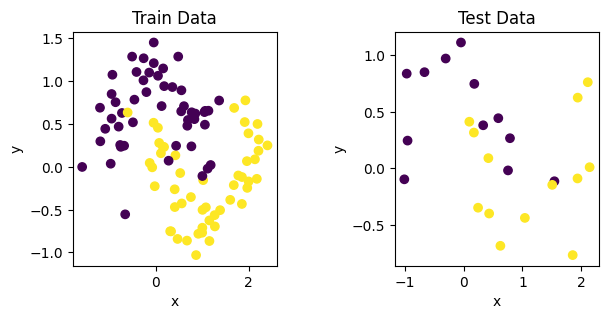

In [16]:
##### STEP 2. #####

# Visualize data
fig = plt.figure(figsize=(7,7))

plt.subplot(2, 2, 1)
plt.scatter(trainDS.X,trainDS.Y, c=trainDS.C)
plt.title('Train Data')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 2)
plt.scatter(testDS.X,testDS.Y, c=testDS.C)
plt.title('Test Data')
plt.xlabel('x')
plt.ylabel('y')

fig.tight_layout(pad=4.0)
plt.show()

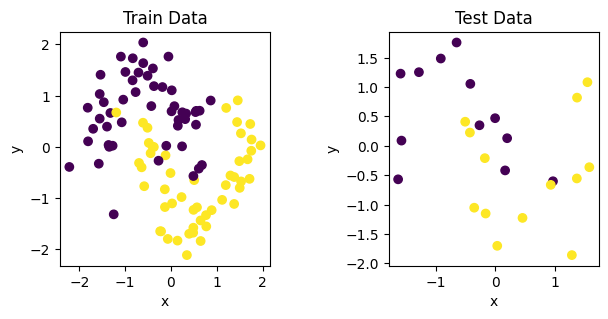

In [17]:
# Normalize data
trainNormDS = trainDS
trainNormDS.X = (trainDS.X - trainDS.mean()[1]) / trainDS.std()[1]
trainNormDS.Y = (trainDS.Y - trainDS.mean()[2]) / trainDS.std()[2]

testNormDS = testDS
testNormDS.X = (testDS.X - testDS.mean()[1]) / testDS.std()[1]
testNormDS.Y = (testDS.Y - testDS.mean()[2]) / testDS.std()[2]

# Visualize normalized data
fig = plt.figure(figsize=(7,7))
fig.tight_layout(pad=4.0)

plt.subplot(2, 2, 1)
plt.scatter(trainNormDS.X,trainNormDS.Y, c=trainNormDS.C)
plt.title('Train Data')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 2)
plt.scatter(testNormDS.X,testNormDS.Y, c=testNormDS.C)
plt.title('Test Data')
plt.xlabel('x')
plt.ylabel('y')

fig.tight_layout(pad=4.0)
plt.show()


In [ ]:
testNormDS.describe().loc[['mean','std']]

,Unnamed: 0,X,Y,C
mean,12.000000,-6.245005e-17,2.220446e-18,0.520000
std,7.359801,1.000000e+00,1.000000e+00,0.509902


In [ ]:
trainNormDS.describe().loc[['mean','std']]

,Unnamed: 0,X,Y,C
mean,49.500000,2.886580e-17,-2.442491e-17,0.500000
std,29.011492,1.000000e+00,1.000000e+00,0.502519


In [18]:
##### STEP 3. #####

# MLP Class:
class MLP(object):
    def __init__(self,inputNode=2,hiddenNode=3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

        # initialize weights using Xavier method
        """in_size = self.inputLayerSize
        hidden_size = self.hiddenLayerSize
        out_size = self.outputLayerSize

        r1 = np.sqrt(2/(in_size+hidden_size))
        r2 = np.sqrt(2/(hidden_size+out_size))
        self.W1 = np.random.uniform(-r1, r1, size =(in_size,hidden_size))
        self.W2 = np.random.uniform(-r2, r2,size=(hidden_size,out_size))"""

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def loss(self, yHat, y):
        #Compute loss for given X,y, use weights already stored in class.
        J = 0.5*sum((y-yHat)**2)
        return J

    def lossCE(self, yHat, y):
        #Compute loss for given X,y, use weights already stored in class.
        J = np.mean(-y*np.log2(yHat) -(1-y)*np.log2(1-yHat))
        return J

    # Derivative of parameters
    def backward(self,X, yHat, y):
        self.yHat = yHat

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2

    # Derivative of parameters (cross entropy loss)
    def backwardCE(self,X, yHat, y):
        self.yHat = yHat

        delta3 = np.multiply(-y/self.yHat+(1-y)/(1-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2

In [19]:
##### STEP 4. #####

def train(NN,X, y,epoch,lr, ce):
    list_loss = []

    for i in range(epoch):
        yHat = NN.forward(X)

        #Compute derivative with respect to W and W2 for a given X and y:
        if ce: gradW1,gradW2 = NN.backwardCE(X,yHat,y)
        else: gradW1,gradW2 = NN.backward(X,yHat,y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%100 == 0 :
            if ce:
              loss = NN.lossCE(yHat,y)
            else:
              loss = NN.loss(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)

    return list_loss

In [21]:
# Define and convert variables
XY = trainNormDS[["X", "Y"]].to_numpy()
C = trainNormDS[["C"]].to_numpy()

# Create NN
NN = MLP()

#Train network with the data:
list_loss_CE = train(NN,XY,C, epoch=10000, lr=0.01, ce = True)


Loss 0=1.4961214786199912
Loss 100=0.49915222330763626
Loss 200=0.48975304416279775
Loss 300=0.4869808437125348
Loss 400=0.48483924237718623
Loss 500=0.48308824102977227
Loss 600=0.48164610852061024
Loss 700=0.48048120971235675
Loss 800=0.47956254815125815
Loss 900=0.47884645999631914
Loss 1000=0.478284032366344
Loss 1100=0.47783240844257413
Loss 1200=0.4774598661818863
Loss 1300=0.47714493707340117
Loss 1400=0.47687344557596795
Loss 1500=0.4766358549868685
Loss 1600=0.47642549336581785
Loss 1700=0.47623749200474097
Loss 1800=0.4760681665618209
Loss 1900=0.4759146485206321
Loss 2000=0.4757746556667247
Loss 2100=0.4756463416460636
Loss 2200=0.4755281926288402
Loss 2300=0.47541895355825453
Loss 2400=0.47531757392907287
Loss 2500=0.47522316700777845
Loss 2600=0.4751349786133753
Loss 2700=0.4750523628730351
Loss 2800=0.47497476316737613
Loss 2900=0.47490169699828905
Loss 3000=0.4748327438604098
Loss 3100=0.47476753543837474
Loss 3200=0.47470574762276835
Loss 3300=0.4746470939609118
Loss 34

We've chosen this number of epochs by increasing a lot the value and looking at the earliest point where it seams to converge so that it does not overfit.

In [ ]:
# Create NN
NN1 = MLP()

#Train network with the data:
list_loss = train(NN1,XY,C, epoch=10000, lr=0.01, ce = False)

Loss 0=[14.20426945]
Loss 100=[6.73444464]
Loss 200=[5.72553685]
Loss 300=[5.44986807]
Loss 400=[5.36762351]
Loss 500=[5.33617478]
Loss 600=[5.32105008]
Loss 700=[5.31243992]
Loss 800=[5.3068809]
Loss 900=[5.30291426]
Loss 1000=[5.29984577]
Loss 1100=[5.29731648]
Loss 1200=[5.29512943]
Loss 1300=[5.29317157]
Loss 1400=[5.2913757]
Loss 1500=[5.28970064]
Loss 1600=[5.28812053]
Loss 1700=[5.28661868]
Loss 1800=[5.28518405]
Loss 1900=[5.2838091]
Loss 2000=[5.28248851]
Loss 2100=[5.28121833]
Loss 2200=[5.27999552]
Loss 2300=[5.27881762]
Loss 2400=[5.27768252]
Loss 2500=[5.27658836]
Loss 2600=[5.27553345]
Loss 2700=[5.27451623]
Loss 2800=[5.27353518]
Loss 2900=[5.27258889]
Loss 3000=[5.27167597]
Loss 3100=[5.27079512]
Loss 3200=[5.26994504]
Loss 3300=[5.26912451]
Loss 3400=[5.26833233]
Loss 3500=[5.26756737]
Loss 3600=[5.26682851]
Loss 3700=[5.2661147]
Loss 3800=[5.26542492]
Loss 3900=[5.26475818]
Loss 4000=[5.26411356]
Loss 4100=[5.26349015]
Loss 4200=[5.26288709]
Loss 4300=[5.26230355]
Los

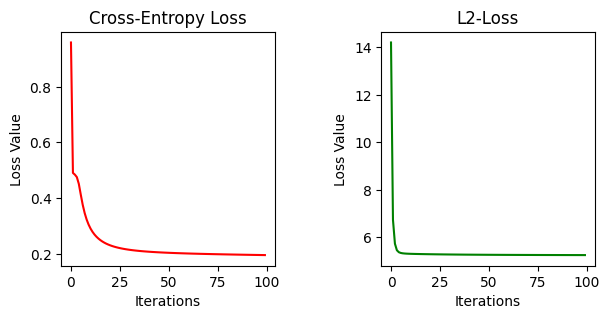

In [ ]:
fig = plt.figure(figsize=(7,7))
fig.tight_layout(pad=4.0)

plt.subplot(2, 2, 1)
plt.plot(list_loss_CE, 'r')
plt.title('Cross-Entropy Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')

plt.subplot(2, 2, 2)
plt.plot(list_loss, 'g')
plt.title('L2-Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')

fig.tight_layout(pad=4.0)
plt.show()

<ipython-input-13-5ef9d2cd8cd4>:18: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  boundary = plt.contourf(a, b, allOutputs.reshape(a.shape), cmap=plt.cm.Spectral, edgecolor = 'k')


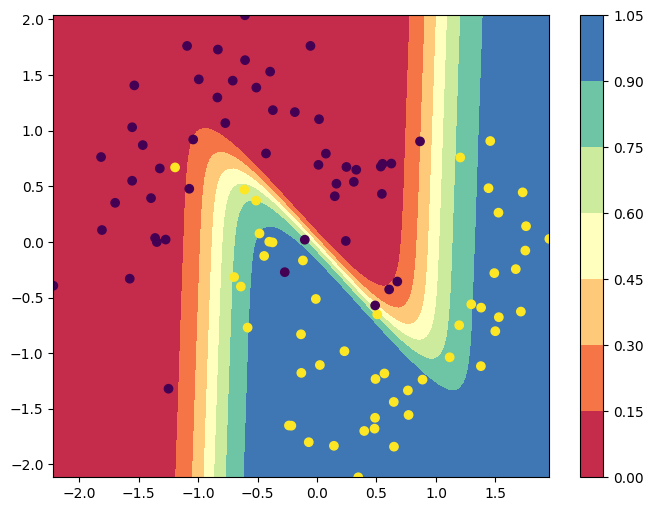

In [ ]:
# Define axis
xAxis = np.linspace(trainNormDS['X'].min(), trainNormDS['X'].max(), 100)
yAxis = np.linspace(trainNormDS['Y'].min(), trainNormDS['Y'].max(), 100)

# Create 2-d grid of samples input for plotting
a, b  = np.meshgrid(xAxis, yAxis)

# Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

# Use the MLP to predict the values in the grid
allOutputs = NN.forward(allInputs)

# Plot figure and contour showing the prediction boundary
fig = plt.figure(figsize=(8,6))
boundary = plt.contourf(a, b, allOutputs.reshape(a.shape), cmap=plt.cm.Spectral, edgecolor = 'k')
plt.colorbar(boundary) # Legend

#Plot points
plt.scatter(trainNormDS.X, trainNormDS.Y, c=trainNormDS.C)

plt.show()

In [ ]:
##### STEP 5. #####
import sklearn.metrics as sk

# Use the learned MLP to estimate the classes of the data in test.csv.
# Compute the accuracy in training and testing dataset

### TEST data ###
XY_test = testNormDS[['X', 'Y']].to_numpy()
C_test = testNormDS[['C']].to_numpy()

### TRAIN data ###
XY_train = trainNormDS[['X', 'Y']].to_numpy()
C_train = trainNormDS[['C']].to_numpy()

# estimate the classes of the data
y_hat_test = NN.forward(XY_test)
y_hat_train = NN.forward(XY_train)

# test accuracy
y_hat_test = np.round(y_hat_test)
y_hat_train = np.round(y_hat_train)

test_acc = sk.accuracy_score(C_test, y_hat_test)
train_acc = sk.accuracy_score(C, y_hat_train)

print('test accuracy: ', test_acc)
print('train accuracy: ', train_acc)

test accuracy:  0.92
train accuracy:  0.97


# Ex. 2

In [ ]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum. \nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps : \n  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom. \n  3. Train the MLP implmented in numpy with this new optimizer. \n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

In [ ]:
class OptimMom(object):
    def __init__(self, learning_rate, momentum_term):
        self.lr = learning_rate
        self.mt = momentum_term
        self.v = None

    def step(self, weight_list, gradient):
        if self.v is None:
            # Initialize the velocity as a list of zeros with same shape as the weight list
            self.v = [np.zeros_like(w) for w in weight_list]
        uw = []
        for i, (w, grad) in enumerate(zip(weight_list, gradient)):
            # Update the velocity for each weight
            self.v[i] = self.mt * self.v[i] + (1 - self.mt)* self.lr * grad
            # Update the weight
            uw.append(w - self.v[i])
        return uw

In [ ]:
# Same training procedure than before but using the optimizer class
def train_woptimizer(NN,XY,C,epoch,optim,p):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(XY)

        gradW1,gradW2 = NN.backward(XY,yHat,C)
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])

        if i%100 == 0 :
            #loss = NN.loss(yHat,C,XY)
            loss = NN.loss(yHat,C)
            if p:
              print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)

    return list_loss

Text(0, 0.5, 'Loss value')

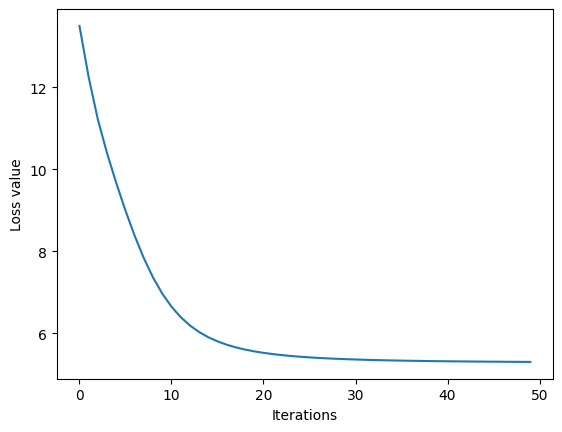

In [ ]:
NN_mom = MLP()
optimMom = OptimMom(0.001, 0.9)
loss_mom = train_woptimizer(NN_mom, XY, C, 5000, optimMom, False)

plt.plot(loss_mom)
plt.xlabel('Iterations')
plt.ylabel('Loss value')

# Ex. 3

In [ ]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps : \n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3

In [ ]:
import numpy as np
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

##### STEP 1. #####

# Generate the same synthetic data as before with PyTorch tensors

XY = trainDS[["X", "Y"]].to_numpy(dtype=np.float32)
C = trainDS[["C"]].to_numpy(dtype=np.float32)


X = torch.tensor(XY)
y = torch.tensor(C)

# Define the MLP in PyTorch

class MLP_PyTorch(nn.Module):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):
        super(MLP_PyTorch, self).__init__()
        #Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode

        # Initialize two modules implementing the two linear layers of the MLP
        self.Linear1 = nn.Linear(self.inputLayerSize, self.hiddenLayerSize)
        self.Linear2 = nn.Linear(self.hiddenLayerSize, self.outputLayerSize)

        self.sigmoid = nn.Sigmoid() # Module implementing the sigmoid funciton
        self.loss = nn.MSELoss() # Module implementing the mean-squared error loss

    # Define the forward pass of the module using the sub-modules declared in the initializer
    def forward(self, X):
        out = self.Linear1(X) # First Linear Layer
        out = self.sigmoid(out) # activation function
        out = self.Linear2(out) # Second Linear Layer
        y_hat = self.sigmoid(out) # final activation function
        return y_hat

    # No need to implement the backward pass since we'll use automatic differentitaion
    #def backward()

In [ ]:
##### STEP 2. #####

# Function to train our MLP with PyTorch
def train_PyTorch(NN,X, y,epoch = 10000,lr = .01,optimizer = None):
    list_loss = []
    for i in range(epoch):
        # reset optimizer at each epoch
        optimizer.zero_grad()

        # Process the dataset with the forward pass
        yHat = NN.forward(X)
        # and compute the loss function
        loss_val = NN.loss(yHat,y)

        # Automatically compute the gradients
        loss_val.backward()
        # Call the optimizer to update the paramters
        optimizer.step()

        # Print loss and save the value at each iteration
        #if i%500 == 0 :
        #if i%100 == 0 :
            #print('Loss {}={}'.format(i,loss_val))
        list_loss.append(loss_val.item())
    print('Loss {}={}'.format(i,loss_val))
    return list_loss

In [ ]:
# define different vesions of the MLP by varying the number of hidden neurons and learing rates

NN1 = MLP_PyTorch(inputNode=2,hiddenNode = 3, outputNode=1)
NN2 = MLP_PyTorch(inputNode=2,hiddenNode = 6, outputNode=1)
NN3 = MLP_PyTorch(inputNode=2,hiddenNode = 11, outputNode=1)


optimizer11 = torch.optim.SGD(NN1.parameters(), lr=.01)
optimizer12 = torch.optim.SGD(NN1.parameters(), lr=.005)
optimizer13 = torch.optim.SGD(NN1.parameters(), lr=.5)

optimizer21 = torch.optim.SGD(NN2.parameters(), lr=.01)
optimizer22 = torch.optim.SGD(NN2.parameters(), lr=.005)
optimizer23 = torch.optim.SGD(NN2.parameters(), lr=.5)

optimizer31 = torch.optim.SGD(NN3.parameters(), lr=.01)
optimizer32 = torch.optim.SGD(NN3.parameters(), lr=.001)
optimizer33 = torch.optim.SGD(NN3.parameters(), lr=.5)

In [ ]:
# train the different vesions of the MLP

list_loss_11 = train_PyTorch(NN1,X,y,optimizer = optimizer11, epoch = 40000)
list_loss_12 = train_PyTorch(NN1,X,y,optimizer = optimizer12, epoch = 40000)
list_loss_13 = train_PyTorch(NN1,X,y,optimizer = optimizer13, epoch = 40000)

list_loss_21 = train_PyTorch(NN2,X,y,optimizer = optimizer21, epoch = 40000)
list_loss_22 = train_PyTorch(NN2,X,y,optimizer = optimizer22, epoch = 40000)
list_loss_23 = train_PyTorch(NN2,X,y,optimizer = optimizer23, epoch = 40000)

list_loss_31 = train_PyTorch(NN3,X,y,optimizer = optimizer31, epoch = 40000)
list_loss_32 = train_PyTorch(NN3,X,y,optimizer = optimizer32, epoch = 40000)
list_loss_33 = train_PyTorch(NN3,X,y,optimizer = optimizer33, epoch = 40000)

Loss 39999=0.10545634478330612
Loss 39999=0.10489509254693985
Loss 39999=0.02205182984471321
Loss 39999=0.10480742156505585
Loss 39999=0.10436540842056274
Loss 39999=0.020938701927661896
Loss 39999=0.10484058409929276
Loss 39999=0.10478182882070541
Loss 39999=0.0203555878251791


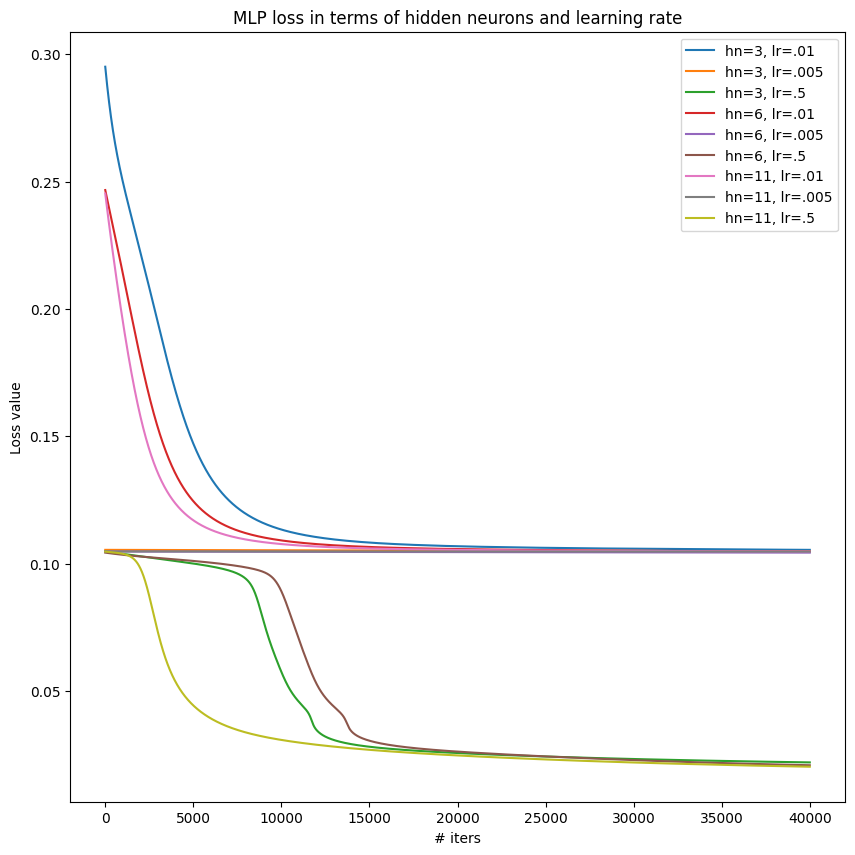

In [ ]:
##### STEP 3. #####

# Analyse the results and compare them
fig = plt.figure(figsize=(10, 10))

plt.plot(list_loss_11, label='hn=3, lr=.01')
plt.plot(list_loss_12, label='hn=3, lr=.005')
plt.plot(list_loss_13, label='hn=3, lr=.5')
plt.plot(list_loss_21, label='hn=6, lr=.01')
plt.plot(list_loss_22, label='hn=6, lr=.005')
plt.plot(list_loss_23, label='hn=6, lr=.5')
plt.plot(list_loss_31, label='hn=11, lr=.01')
plt.plot(list_loss_32, label='hn=11, lr=.005')
plt.plot(list_loss_33, label='hn=11, lr=.5')

plt.title('MLP loss in terms of hidden neurons and learning rate')
plt.xlabel('# iters')
plt.ylabel('Loss value')
plt.plot()
plt.legend()
plt.show()

From one hand, we see that the smallest learning rate (value of 0.005) seems to have found a local minimum right at the start and doesn't move from there, it is a bit odd to us as we were expecting the lowest learning rate to advance slowly to the local minimum and not find it just at the start. However, the interesting thing to notice here is that the biggest learning rate (of value 0.5) has been able to reach a much lower minimum than the other one of value 0.1. We think that the largest learning rate was able to discard the local minimum and that the learning rate of 0.1 was not able to see any further as the gradient descent did not advance enough to observe a better optimization. This observation allowed us to notice the importance of the learning rate in terms of the minimization of the loss function as the gradient descent can get stuck in a local minimum.


On the other hand we see that a higher number of hidden neurons has a direct effect in terms of loss function optimization: it seems to us that the MLP has a sweet spot where a value neither too low nor too high of hidden neurons is the most suitable to achieve the best configuration of weights. We see that the lowest loss value is attributed to the MLP with 6 hidden neurons and 0.5 learning rate. It appears that 3 and 11 hidden neurons (with a learning rate of 0.5) do not achieve a decision boundary as optimal as 6 hidden neurons; this allows us to see that each data set has a different complexity and that by increasing the number of hidden neurons indiscriminately the decision boundary will not necessarily improve.